<a href="https://colab.research.google.com/github/githubengland/githubengland/blob/main/Cleaned_finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning


Unsupervised learning in the context of artificial intelligence (AI) for earth observation refers to the use of machine learning algorithms to analyze and interpret satellite imagery or other geospatial data without the need for labeled training data. This type of learning is particularly valuable in earth observation because it allows for the discovery of patterns, structures, and relationships in data that may not be immediately apparent.

The tasks in this notebook will be on classification of cloud coverage based on image classification based on Sentinel-2 optical data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### K-means Clustering

K-means clustering is a popular unsupervised learning algorithm used to partition a dataset into \( K \) distinct, non-overlapping subsets or clusters. The goal is to group data points such that those within each cluster are more similar to each other than to those in other clusters. Here's a detailed explanation of the process and applications:

### How K-means Clustering Works

1. **Initialization**:
   - Choose the number of clusters \( K \).
   - Initialize \( K \) centroids randomly or using some heuristic methods. Each centroid represents the center of a cluster.

2. **Assignment Step**:
   - Assign each data point to the nearest centroid based on a distance metric (commonly Euclidean distance). This forms \( K \) clusters.

3. **Update Step**:
   - Recalculate the centroids as the mean of all data points assigned to each cluster.

4. **Repeat**:
   - Repeat the assignment and update steps until the centroids no longer change significantly or a maximum number of iterations is reached. This convergence indicates that the clusters are stable.


### Applications of K-means Clustering

1. **Image Segmentation**:
   - Group pixels into clusters based on color, intensity, or texture to simplify and analyze images.

2. **Customer Segmentation**:
   - Group customers into clusters based on purchasing behavior, demographics, or preferences for targeted marketing.

3. **Document Clustering**:
   - Organize documents into clusters based on content similarity for information retrieval and topic modeling.

4. **Anomaly Detection**:
   - Identify outliers by finding data points that do not fit well into any cluster.

5. **Earth Observation**:
   - Classify land cover types from satellite images by clustering pixels with similar spectral properties.

### Advantages and Limitations

**Advantages**:
- **Simplicity**: Easy to understand and implement.
- **Efficiency**: Works well with large datasets.

**Limitations**:
- **Choosing \( K \)**: The number of clusters \( K \) must be specified in advance.
- **Sensitivity to Initialization**: Different initializations can lead to different final clusters.
- **Assumes Spherical Clusters**: Works best when clusters are roughly spherical and of similar size.
- **Scalability**: Can be computationally expensive for very large datasets or high-dimensional data.

### Example
Imagine you have satellite images of different land cover types. By applying K-means clustering to the pixel values, you can group pixels into clusters representing different types of land cover such as water, forest, urban areas, and agricultural fields. Each cluster will have a centroid representing the average spectral signature of that land cover type, and each pixel will be assigned to the cluster whose centroid it is closest to.

In summary, K-means clustering is a straightforward and widely used method for partitioning data into distinct clusters, making it valuable for various applications across different fields, including earth observation.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


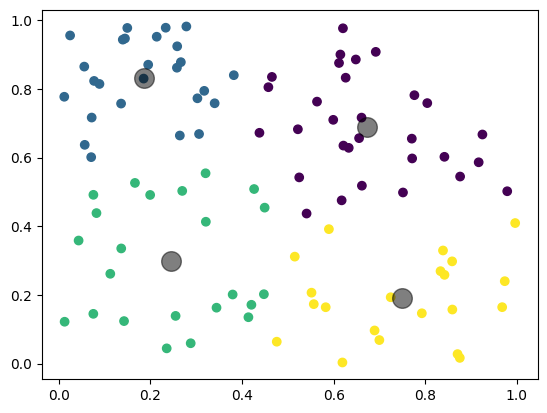

In [ ]:
# Python code for K-means clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Sample data
X = np.random.rand(100, 2)

# K-means model
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()


Gaussian Mixture Models (GMM) are a probabilistic model used in unsupervised learning for clustering, density estimation, and pattern recognition. GMMs assume that the data is generated from a mixture of several Gaussian distributions, each representing a different cluster. This approach allows GMMs to model more complex, multimodal data distributions compared to simpler clustering algorithms like K-means.

### Applications of Gaussian Mixture Models

1. **Clustering**:
   - GMM can cluster data into different groups based on the underlying Gaussian distributions, allowing for more flexibility in the shape of clusters compared to K-means.

2. **Density Estimation**:
   - GMM can estimate the probability density function of a dataset, useful for identifying regions of high and low data density.

3. **Anomaly Detection**:
   - By modeling the normal data distribution, GMM can identify anomalies or outliers as data points with low likelihood under the model.

4. **Image Segmentation**:
   - GMM can segment images by modeling the distribution of pixel intensities or colors.

5. **Speaker Identification**:
   - In speech processing, GMMs can model the distribution of feature vectors for different speakers, aiding in speaker recognition tasks.

### Advantages and Limitations

**Advantages**:
- **Flexibility**: GMMs can model complex, multimodal data distributions with varying shapes and orientations.
- **Soft Clustering**: GMM assigns probabilities to data points for belonging to each cluster, allowing for a more nuanced clustering compared to hard assignments in K-means.

**Limitations**:
- **Initialization Sensitivity**: The EM algorithm can converge to local optima depending on the initial parameter values.
- **Computational Complexity**: GMMs can be computationally intensive, especially for high-dimensional data or large datasets.
- **Model Selection**: Determining the optimal number of Gaussian components (clusters) can be challenging and often requires model selection criteria like BIC (Bayesian Information Criterion) or AIC (Akaike Information Criterion).

### Example
Imagine you have a dataset of different types of plants characterized by features like height, leaf size, and color. By applying GMM, you can model the distribution of these features as a mixture of Gaussian distributions, each representing a different plant type. This allows you to classify new plant observations probabilistically and identify the most likely type based on the feature distribution.

In summary, Gaussian Mixture Models are a powerful and flexible tool for clustering and density estimation in unsupervised learning, capable of modeling complex data distributions beyond the capabilities of simpler methods like K-means.

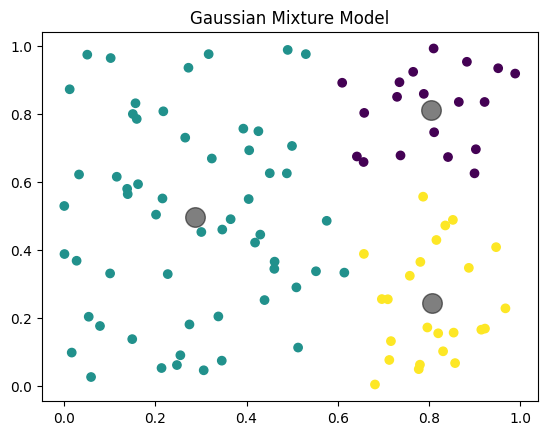

In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

# Sample data
X = np.random.rand(100, 2)

# GMM model
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
y_gmm = gmm.predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, cmap='viridis')
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Gaussian Mixture Model')
plt.show()


## Image Classification
Image classification will be based on the data from Sentinel 2. The area of the data will be from a region in East Japan, above the Boso Peninsula in Chiba Prefecture.

### K-Means Implementation

This section will go through the K-Means Implementation.

### Explanation of the Code

Below, the code performs K-means clustering on Sentinel-2 satellite image bands using the following steps:

1. **Import Libraries**:
   - Installs and imports the necessary libraries: `rasterio`, `numpy`, `scikit-learn`, and `matplotlib`.

2. **Set Paths**:
   - Specifies the file paths for the Sentinel-2 image bands.

3. **Read and Stack Band Images**:
   - Reads the specified bands (B1, B2, B3) from the image files using `rasterio`.
   - Stacks the bands into a single 3D array.

4. **Create Valid Data Mask**:
   - Creates a mask to filter out invalid data points (pixels with zero values in any band).

5. **Reshape Data for K-means**:
   - Reshapes the valid data points into a 2D array for K-means clustering.

6. **K-means Clustering**:
   - Applies K-means clustering to the reshaped data to identify clusters.
   - Assigns cluster labels to the valid data points.

7. **Generate Output Image**:
   - Creates an output image with cluster labels.
   - Visualizes the result using `matplotlib`.

### Additional Information

1. **Libraries**:
   - `rasterio`: For reading geospatial raster data.
   - `numpy`: For numerical operations and array manipulations.
   - `scikit-learn`: For machine learning algorithms (K-means clustering).
   - `matplotlib`: For plotting and visualization.

2. **K-means Clustering**:
   - The number of clusters is set to 2 (`n_clusters=2`), which means the algorithm will partition the data into 2 clusters.
   - `random_state=0` ensures reproducibility of the results.

3. **Visualization**:
   - The resulting cluster labels are visualized using `matplotlib` with a color map (`viridis`) to distinguish between different clusters.


In [ ]:
! ls /content/drive/MyDrive/thefinalproject/

 AIforEOindividualproject.ipynb   finalproject.ipynb
'Cleaned finalproject.ipynb'	  S2B_MSIL2A_20240426T012659_N0510_R074_T54SVE_20240426T033641.SAFE


In [ ]:
! pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 59.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


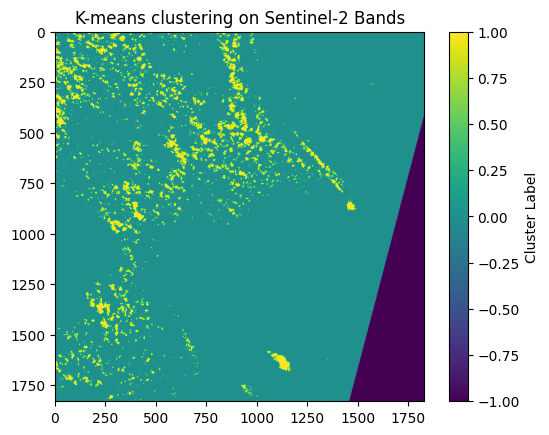

In [ ]:
!pip install rasterio
!pip install scikit-learn
!pip install matplotlib

import rasterio
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

base_path = "/content/drive/MyDrive/thefinalproject/S2B_MSIL2A_20240426T012659_N0510_R074_T54SVE_20240426T033641.SAFE/GRANULE/L2A_T54SVE_A037280_20240426T013540/IMG_DATA/R60m/" # You need to specify the path
bands_paths = {
    'B3': "/content/drive/MyDrive/thefinalproject/S2B_MSIL2A_20240426T012659_N0510_R074_T54SVE_20240426T033641.SAFE/GRANULE/L2A_T54SVE_A037280_20240426T013540/IMG_DATA/R60m/T54SVE_20240426T012659_B03_60m.jp2",
    'B2': "/content/drive/MyDrive/thefinalproject/S2B_MSIL2A_20240426T012659_N0510_R074_T54SVE_20240426T033641.SAFE/GRANULE/L2A_T54SVE_A037280_20240426T013540/IMG_DATA/R60m/T54SVE_20240426T012659_B02_60m.jp2",
    'B1': "/content/drive/MyDrive/thefinalproject/S2B_MSIL2A_20240426T012659_N0510_R074_T54SVE_20240426T033641.SAFE/GRANULE/L2A_T54SVE_A037280_20240426T013540/IMG_DATA/R60m/T54SVE_20240426T012659_B01_60m.jp2"
}

# Read and stack the band images
band_data = []
for band in ['B3', 'B2', 'B1']:
    with rasterio.open(bands_paths[band]) as src:
        band_data.append(src.read(1))

# Stack bands and create a mask for valid data (non-zero values in all bands)
band_stack = np.dstack(band_data)
valid_data_mask = np.all(band_stack > 0, axis=2)

# Reshape for K-means, only including valid data
X = band_stack[valid_data_mask].reshape((-1, 3))

# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_

# Create an empty array for the result, filled with a no-data value (e.g., -1)
labels_image = np.full(band_stack.shape[:2], -1, dtype=int)

# Place cluster labels in the locations corresponding to valid data
labels_image[valid_data_mask] = labels

# Plotting the result
plt.imshow(labels_image, cmap='viridis')
plt.title('K-means clustering on Sentinel-2 Bands')
plt.colorbar(label='Cluster Label')
plt.show()


### Gaussian Mixture Model (GMM) Implementation

This section will go through the GMM Implementation.

### Explanation of the Code

The code below performs Gaussian Mixture Model (GMM) clustering on Sentinel-2 satellite image bands.

Here is a step-by-step explanation:

1. **Import Libraries**:
   - Installs and imports the necessary libraries: `os`, `rasterio`, `numpy`, `sklearn.mixture`, and `matplotlib`.

2. **Set Paths**:
   - Specifies the base path for the Sentinel-2 image files.

3. **List Directory Contents**:
   - Prints the contents of the directory to ensure the correct file paths for the bands.

4. **Update Band Paths**:
   - Specifies the paths for the specific bands to be used (B1, B2, B3).

5. **Check for Missing Files**:
   - Checks if all the specified band files exist. If any files are missing, it prints an error message.

6. **Read and Stack Band Images**:
   - Reads the specified bands using `rasterio` and stacks them into a 3D array. If any bands fail to load, it prints an error message.

7. **Create Valid Data Mask**:
   - Creates a mask to filter out invalid data points (pixels with zero values in any band).

8. **Reshape Data for GMM**:
   - Reshapes the valid data points into a 2D array for GMM clustering.

9. **GMM Clustering**:
   - Applies GMM clustering to the reshaped data to identify clusters.
   - Assigns cluster labels to the valid data points.

10. **Generate Output Image**:
    - Creates an output image with cluster labels.
    - Visualizes the result using `matplotlib`.


### Additional Information

1. **Libraries**:
   - `os`: For file path manipulations and directory listing.
   - `rasterio`: For reading geospatial raster data.
   - `numpy`: For numerical operations and array manipulations.
   - `sklearn.mixture`: For Gaussian Mixture Model clustering.
   - `matplotlib`: For plotting and visualization.

2. **Gaussian Mixture Model (GMM)**:
   - The number of components is set to 2 (`n_components=2`), which means the algorithm will partition the data into 2 clusters.
   - `random_state=0` ensures reproducibility of the results.

3. **Visualization**:
   - The resulting cluster labels are visualized using `matplotlib` with a color map (`viridis`) to distinguish between different clusters.

Listing directory contents:
T54SVE_20240426T012659_B03_60m.jp2
T54SVE_20240426T012659_B01_60m.jp2
T54SVE_20240426T012659_B05_60m.jp2
T54SVE_20240426T012659_B11_60m.jp2
T54SVE_20240426T012659_B06_60m.jp2
T54SVE_20240426T012659_B07_60m.jp2
T54SVE_20240426T012659_B09_60m.jp2
T54SVE_20240426T012659_AOT_60m.jp2
T54SVE_20240426T012659_B04_60m.jp2
T54SVE_20240426T012659_B02_60m.jp2
T54SVE_20240426T012659_B8A_60m.jp2
T54SVE_20240426T012659_SCL_60m.jp2
T54SVE_20240426T012659_B12_60m.jp2
T54SVE_20240426T012659_TCI_60m.jp2
T54SVE_20240426T012659_WVP_60m.jp2


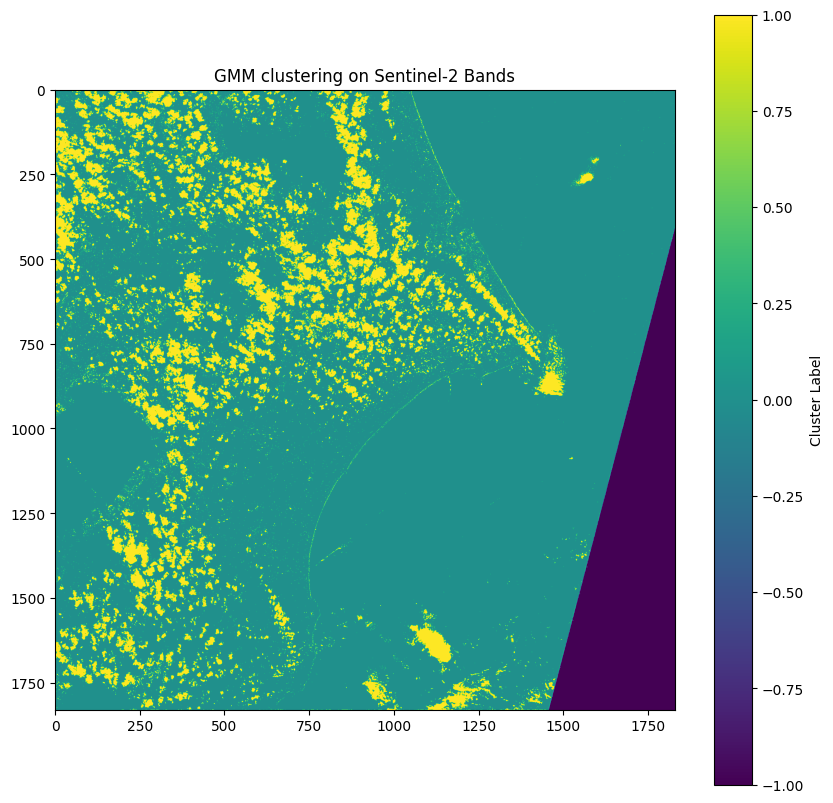

In [ ]:
import os
import rasterio
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Paths to the band images
base_path = "/content/drive/MyDrive/thefinalproject/S2B_MSIL2A_20240426T012659_N0510_R074_T54SVE_20240426T033641.SAFE/GRANULE/L2A_T54SVE_A037280_20240426T013540/IMG_DATA/R60m/" # You need to specify the path

# List directory contents to debug paths
print("Listing directory contents:")
for root, dirs, files in os.walk(base_path):
    for filename in files:
        print(filename)

# Update the paths based on the actual filenames found
bands_paths = {
    'B3': "/content/drive/MyDrive/thefinalproject/S2B_MSIL2A_20240426T012659_N0510_R074_T54SVE_20240426T033641.SAFE/GRANULE/L2A_T54SVE_A037280_20240426T013540/IMG_DATA/R60m/T54SVE_20240426T012659_B03_60m.jp2",
    'B2': "/content/drive/MyDrive/thefinalproject/S2B_MSIL2A_20240426T012659_N0510_R074_T54SVE_20240426T033641.SAFE/GRANULE/L2A_T54SVE_A037280_20240426T013540/IMG_DATA/R60m/T54SVE_20240426T012659_B02_60m.jp2",
    'B1': "/content/drive/MyDrive/thefinalproject/S2B_MSIL2A_20240426T012659_N0510_R074_T54SVE_20240426T033641.SAFE/GRANULE/L2A_T54SVE_A037280_20240426T013540/IMG_DATA/R60m/T54SVE_20240426T012659_B01_60m.jp2"
}

# Check if all specified files exist
missing_files = [band for band, path in bands_paths.items() if not os.path.isfile(path)]
if missing_files:
    print(f"Error: The following files are missing: {', '.join(missing_files)}")
else:
    # Read and stack the band images
    band_data = []
    for band in ['B1', 'B2', 'B3']:
        try:
            with rasterio.open(bands_paths[band]) as src:
                band_data.append(src.read(1))
        except rasterio.errors.RasterioIOError:
            print(f"Error: Unable to open {bands_paths[band]}")
            continue

    # Check if all bands were loaded
    if len(band_data) != 3:
        print("Error: Not all band images were loaded. Please check the file paths.")
    else:
        # Stack bands and create a mask for valid data (non-zero values in all bands)
        band_stack = np.dstack(band_data)
        valid_data_mask = np.all(band_stack > 0, axis=2)

        # Reshape for GMM, only including valid data
        X = band_stack[valid_data_mask].reshape((-1, 3))

        # GMM clustering
        gmm = GaussianMixture(n_components=2, random_state=0).fit(X)
        labels = gmm.predict(X)

        # Create an empty array for the result, filled with a no-data value (e.g., -1)
        labels_image = np.full(band_stack.shape[:2], -1, dtype=int)

        # Place GMM labels in the locations corresponding to valid data
        labels_image[valid_data_mask] = labels

        # Plotting the result
        plt.figure(figsize=(10, 10))
        plt.imshow(labels_image, cmap='viridis')
        plt.title('GMM clustering on Sentinel-2 Bands')
        plt.colorbar(label='Cluster Label')
        plt.show()


###Dimensions of the image
Here, we will check the dimensions of the satellite imagery.

In [ ]:
# Check the dimensions of labels_image
height, width = labels_image.shape
print(f"labels_image dimensions: {height} x {width}")


labels_image dimensions: 1830 x 1830


### Zooming in to the image
### Explanation of the Code

This code snippet extracts a subset of a previously generated cluster label image and plots it to provide a zoomed-in view of a specific region.

Here's a detailed breakdown of the code and the resulting output:

1. **Define Slicing Range**:
   - The variables `x_start`, `x_end`, `y_start`, and `y_end` define the range of indices for slicing the image. These variables determine the region of the image to be zoomed in on.

2. **Ensure Range is Within Bounds**:
   - The code ensures that the slicing range does not exceed the dimensions of the image. If `x_end` or `y_end` exceed the image dimensions (`height` and `width`), they are adjusted accordingly.

3. **Print Slicing Range**:
   - The slicing range is printed for verification.

4. **Extract Subset**:
   - The specified subset of the `labels_image` is extracted using the slicing indices.

5. **Print Unique Values**:
   - The unique values in the extracted subset are printed. These values represent the different clusters identified by the Gaussian Mixture Model (GMM) clustering.

6. **Plot the Subset**:
   - The extracted subset is plotted using `matplotlib` with a color map (`viridis`). A color bar is added to indicate the cluster labels.

### Analysis of the Output

1. **Slicing Range**:
   - The slicing range `x (1300:1830), y (1300:1830)` indicates the region of the image to be zoomed in on. This range was selected to focus on a particular area within the bounds of the image dimensions.

2. **Unique Values**:
   - The unique values `[-1, 0, 1]` in the subset represent different clusters. The value `-1` likely indicates no-data or background areas, while `0` and `1` are the clusters identified by the GMM.

3. **Visualization**:
   - The plotted subset provides a zoomed-in view of the specified region in the `labels_image`. The color map `viridis` helps in distinguishing between different clusters.

### Conclusion

The code effectively zooms in on a specified region of the clustered image, ensuring the slicing range is within bounds, and visualizes the selected subset. This approach helps in analyzing specific areas of interest in more detail, facilitating better understanding and interpretation of the clustering results.

Slicing range: x (1300:1830), y (1300:1830)
Data in specified range (unique values): [-1  0  1]


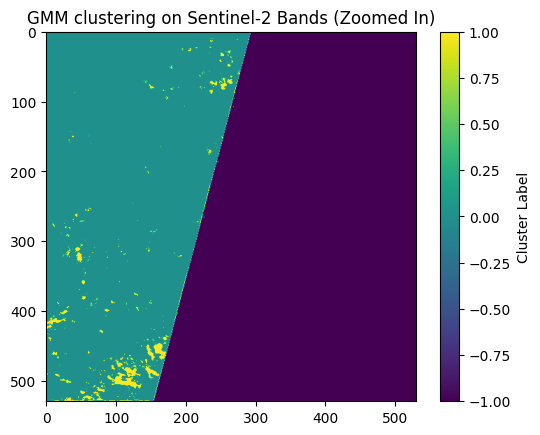

In [ ]:
# Updated slicing range to be within bounds
x_start, x_end = 1300, 1830
y_start, y_end = 1300, 1830

# Ensure the range is within bounds
if x_end > height:
    x_end = height
if y_end > width:
    y_end = width

print(f"Slicing range: x ({x_start}:{x_end}), y ({y_start}:{y_end})")

# Check the data in the specified range
subset = labels_image[x_start:x_end, y_start:y_end]
print(f"Data in specified range (unique values): {np.unique(subset)}")

# Plot the data in the specified range
plt.imshow(subset, cmap='viridis')
plt.title('GMM clustering on Sentinel-2 Bands (Zoomed In)')
plt.colorbar(label='Cluster Label')
plt.show()


### Visualization of data

### Explanation of the Code

The code below demonstrates how to read and visualize Sentinel-2 satellite imagery using the `rasterio` library in Python.

Here's a step-by-step explanation:

1. **Library Installation and Imports**:
   - The code installs `rasterio`, a library for reading and writing geospatial raster data.
   - Necessary libraries are imported: `rasterio` for handling raster data, `numpy` for numerical operations, and `matplotlib.pyplot` for plotting.

2. **Set File Paths**:
   - `base_path` specifies the directory containing the Sentinel-2 imagery files.
   - `bands_paths` is a dictionary that maps band names (`B3`, `B2`, `B1`) to their respective file paths.

3. **Read Band Data**:
   - An empty dictionary `band_data` is created to store the raster data for each band.
   - A loop iterates through the `bands_paths` dictionary, opening each file with `rasterio` and reading the first band (assuming each file contains a single band).
   - The data for each band is stored in `band_data` and its dimensions are printed.

4. **Access and Print Band Data**:
   - The band data for `B3`, `B2`, and `B1` are accessed from the `band_data` dictionary.
   - Statistics (minimum and maximum values) for each band's data are printed.

5. **Plotting**:
   - The data for the B3 band (Green) is plotted using `matplotlib`.
   - The plot is displayed with a title and a color bar indicating reflectance values.

### Analysis of the Output

1. **Dimensions**:
   - The dimensions of the `B3`, `B2`, and `B1` bands are all (1830, 1830), indicating that each image is 1830 pixels by 1830 pixels.

2. **Data Statistics**:
   - The minimum and maximum reflectance values for each band are printed, showing the range of values in the images:
     - `B3` (Green band): min = 0, max = 19147
     - `B2` (Blue band): min = 0, max = 20742
     - `B1` (Coastal aerosol band): min = 0, max = 22257

3. **Visualization**:
   - The B3 band (Green) is visualized as a grayscale image, with a color bar indicating the reflectance values.

### Conclusion

This code provides a simple yet effective way to read, analyze, and visualize Sentinel-2 imagery using Python. It demonstrates how to work with geospatial raster data using `rasterio`, perform basic data exploration with `numpy`, and visualize the data with `matplotlib`. This approach can be extended to perform more complex analyses, such as cloud coverage classification, vegetation index calculation, and land cover mapping.

B3 dimensions: (1830, 1830)
B2 dimensions: (1830, 1830)
B1 dimensions: (1830, 1830)
B3 data - min: 0, max: 19147
B2 data - min: 0, max: 20742
B1 data - min: 0, max: 22257


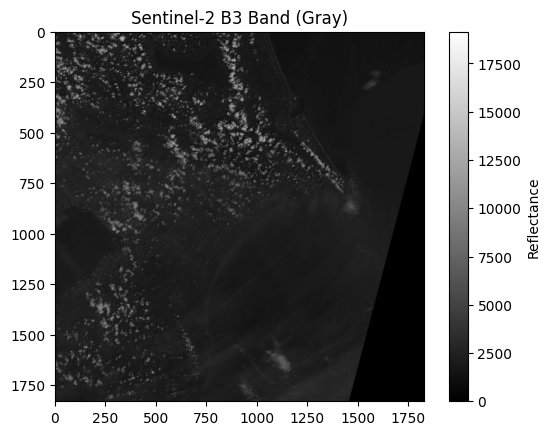

In [ ]:
!pip install rasterio
import rasterio
import numpy as np
import matplotlib.pyplot as plt
base_path = "/content/drive/MyDrive/thefinalproject/S2B_MSIL2A_20240426T012659_N0510_R074_T54SVE_20240426T033641.SAFE/GRANULE/L2A_T54SVE_A037280_20240426T013540/IMG_DATA/R60m/"
bands_paths = {
    'B3': base_path + "T54SVE_20240426T012659_B03_60m.jp2",
    'B2': base_path + "T54SVE_20240426T012659_B02_60m.jp2",
    'B1': base_path + "T54SVE_20240426T012659_B01_60m.jp2"
}
band_data = {}

for band_name, band_path in bands_paths.items():
    with rasterio.open(band_path) as src:
        band_data[band_name] = src.read(1)
        print(f"{band_name} dimensions: {band_data[band_name].shape}")

# Now you can access the band data
B3_data = band_data['B3']
B2_data = band_data['B2']
B1_data = band_data['B1']

# Print some statistics about the data
print(f"B3 data - min: {np.min(B3_data)}, max: {np.max(B3_data)}")
print(f"B2 data - min: {np.min(B2_data)}, max: {np.max(B2_data)}")
print(f"B1 data - min: {np.min(B1_data)}, max: {np.max(B1_data)}")

# Plot one of the bands
plt.imshow(B3_data, cmap='gray')
plt.title('Sentinel-2 B3 Band (Gray)')
plt.colorbar(label='Reflectance')
plt.show()


### Plotting waves
Plotting waves in cloud coverage analysis typically involves analyzing the spatial patterns and temporal changes in cloud cover data to identify wave-like structures or patterns. This can be done using satellite imagery data and appropriate image processing and analysis techniques.

### Explanation of the Code

The code below demonstrates how to read Sentinel-2 satellite imagery, process it, and visualize wave-like patterns based on the sum of several spectral bands.

Here is a step-by-step explanation:

1. **Library Installation and Imports**:
   - The code installs `rasterio` and `scikit-learn` for handling raster data and performing data normalization, respectively.
   - Necessary libraries are imported: `rasterio` for raster data operations, `numpy` for numerical computations, `StandardScaler` from `scikit-learn` for data standardization, and `matplotlib.pyplot` for plotting.

2. **Set File Paths**:
   - `base_path` specifies the directory containing the Sentinel-2 image files.
   - `bands_paths` is a dictionary mapping band names (`B3`, `B2`, `B1`) to their respective file paths.

3. **Read Band Data**:
   - An empty dictionary `band_data` is created to store the raster data for each band.
   - A loop iterates through the `bands_paths` dictionary, opening each file with `rasterio` and reading the first band (assuming each file contains a single band).
   - The data for each band is stored in `band_data`, and its dimensions are printed.

4. **Access and Print Band Data**:
   - The band data for `B3`, `B2`, and `B1` are accessed from the `band_data` dictionary.
   - Statistics (minimum and maximum values) for each band's data are printed.

5. **Compute Synthetic 'Waves' Feature**:
   - A synthetic `waves` feature is created by summing the pixel values of the three bands (`B1_data`, `B2_data`, `B3_data`).
   - The dimensions of the `waves` data are printed.

6. **Flatten and Stack Features for Processing**:
   - The band data and the `waves` feature are flattened into 1D arrays.
   - These arrays are then stacked into a single dataset for further processing.

7. **Remove Invalid Data**:
   - Rows with NaN or infinite values are removed from the dataset to ensure clean data for analysis.

8. **Standardize the Data**:
   - The data is standardized using `StandardScaler` to normalize the features.
   - Statistics (minimum and maximum values) of the standardized data are printed.

9. **Plot the 'Waves' Feature**:
   - The `waves` feature is visualized using `matplotlib` with a color bar indicating the wave intensity.

### Analysis of the Output

1. **Dimensions**:
   - The dimensions of the `B3`, `B2`, and `B1` bands are all (1830, 1830), indicating that each image is 1830 pixels by 1830 pixels.

2. **Data Statistics**:
   - The minimum and maximum reflectance values for each band are printed, showing the range of values in the images:
     - `B3` (Green band): min = 0, max = 19147
     - `B2` (Blue band): min = 0, max = 20742
     - `B1` (Coastal aerosol band): min = 0, max = 22257

3. **Synthetic 'Waves' Feature**:
   - The `waves` feature is calculated by summing the pixel values of the three bands, providing an aggregate measure.

4. **Standardized Data**:
   - The data is standardized to have a mean of 0 and a standard deviation of 1, which is useful for further analysis and machine learning.

5. **Visualization**:
   - The `waves` feature is visualized as an image, showing the aggregate values of the summed bands. The color bar indicates the intensity of the waves.

### Conclusion

This code provides a comprehensive approach to reading, processing, and visualizing Sentinel-2 imagery using Python. It demonstrates how to handle geospatial raster data, perform basic data exploration and preprocessing, and visualize the results. The approach can be extended to more complex analyses, such as detecting wave patterns in cloud coverage, using advanced image processing and machine learning techniques.

B3 dimensions: (1830, 1830)
B2 dimensions: (1830, 1830)
B1 dimensions: (1830, 1830)
B3 data - min: 0, max: 19147
B2 data - min: 0, max: 20742
B1 data - min: 0, max: 22257
waves dimensions: (1830, 1830)
Standardized data - min: -1.5937449461918751, max: 13.349922533599266


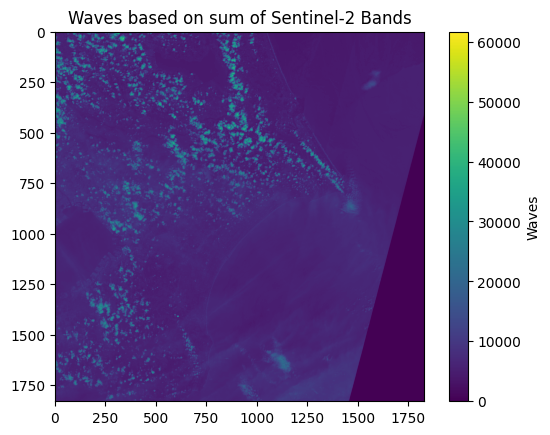

In [ ]:
!pip install rasterio scikit-learn
import rasterio
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
base_path = "/content/drive/MyDrive/thefinalproject/S2B_MSIL2A_20240426T012659_N0510_R074_T54SVE_20240426T033641.SAFE/GRANULE/L2A_T54SVE_A037280_20240426T013540/IMG_DATA/R60m/"
bands_paths = {
    'B3': base_path + "T54SVE_20240426T012659_B03_60m.jp2",
    'B2': base_path + "T54SVE_20240426T012659_B02_60m.jp2",
    'B1': base_path + "T54SVE_20240426T012659_B01_60m.jp2"
}
band_data = {}

for band_name, band_path in bands_paths.items():
    with rasterio.open(band_path) as src:
        band_data[band_name] = src.read(1)
        print(f"{band_name} dimensions: {band_data[band_name].shape}")

# Now you can access the band data
B3_data = band_data['B3']
B2_data = band_data['B2']
B1_data = band_data['B1']

# Print some statistics about the data
print(f"B3 data - min: {np.min(B3_data)}, max: {np.max(B3_data)}")
print(f"B2 data - min: {np.min(B2_data)}, max: {np.max(B2_data)}")
print(f"B1 data - min: {np.min(B1_data)}, max: {np.max(B1_data)}")
# Example: Define 'waves' based on a synthetic calculation
# For demonstration, let's create a synthetic 'waves' feature as the sum of the bands
waves = B1_data + B2_data + B3_data

# Check the shape of 'waves'
print(f"waves dimensions: {waves.shape}")

# Convert to 1D arrays for further processing
B3_np = B3_data.flatten()
B2_np = B2_data.flatten()
B1_np = B1_data.flatten()
waves_np = waves.flatten()

# Stack the features into a single dataset
data = np.column_stack((B3_np, B2_np, B1_np, waves_np))

# Remove any rows with invalid data (e.g., where values are NaN or infinite)
data = data[~np.isnan(data).any(axis=1)]
data = data[~np.isinf(data).any(axis=1)]

# Standardize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# Print some statistics of the standardized data
print(f"Standardized data - min: {np.min(data_normalized)}, max: {np.max(data_normalized)}")

# Optional: visualize one of the features (e.g., waves)
plt.imshow(waves, cmap='viridis')
plt.title('Waves based on sum of Sentinel-2 Bands')
plt.colorbar(label='Waves')
plt.show()


### Explanation of the Code

The code here plots a single row of the `waves` data, specifically the row at index 1000. Here’s a detailed explanation of each part:

1. **Importing Libraries**:
   - The required libraries `rasterio`, `numpy`, and `matplotlib.pyplot` are assumed to be already imported.

2. **Plotting the Data**:
   - `plt.plot(waves[1000])` plots the data of the row at index 1000 from the `waves` array.

- `plt.plot(waves[1000])`:
  - This line of code uses `matplotlib` to plot the values in the 1000th row of the `waves` array.
  - The `waves` array is a 2D numpy array where each element represents a pixel value resulting from the sum of three bands (`B1`, `B2`, `B3`).
  - By accessing `waves[1000]`, you get a 1D array corresponding to the values of the pixels in the 1000th row.
  - The `plt.plot()` function creates a line plot of these values.

- `plt.show()`:
  - This function call is used to display the plot.

### Interpretation of the Plot

The plot shows the pixel values in the 1000th row of the `waves` array. The x-axis represents the column indices of the row, and the y-axis represents the pixel values (sum of the bands).

Here are some observations:
- The peaks in the plot indicate areas with higher pixel values in the `waves` data, which might correspond to areas with more significant reflectance or cloud cover in the original bands.
- The drops to zero at the end of the plot indicates the boundary of the image where it is an area with no data.

### Conclusion

The provided code snippet visualizes the intensity values of the 1000th row from the `waves` array, which is derived from the sum of three Sentinel-2 bands. The plot helps in understanding the distribution and variation of the wave intensity along this specific row.

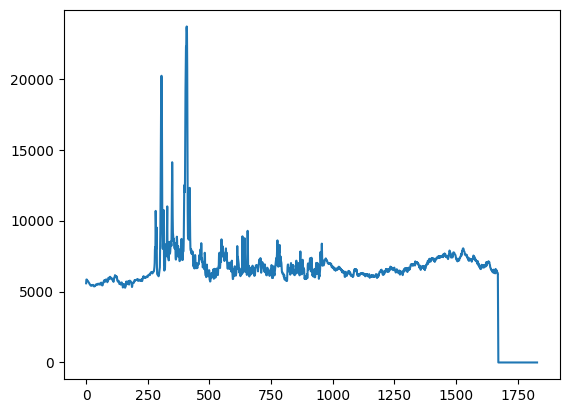

In [ ]:
plt.plot(waves[1000])

### Final conclusion for this project

This project successfully demonstrated the application of unsupervised learning techniques for earth observation, specifically focusing on cloud coverage classification using Sentinel-2 satellite imagery. By leveraging K-means clustering and Gaussian Mixture Models (GMM), we explored two robust methods for image segmentation and pattern recognition.

### Key Achievements:

1. **Understanding Unsupervised Learning**:
   - The project began with a comprehensive introduction to unsupervised learning, highlighting its importance in earth observation where labeled data is often scarce.

2. **K-means Clustering**:
   - K-means clustering was applied to Sentinel-2 imagery, demonstrating its ability to partition the image into distinct clusters based on spectral properties. The algorithm's simplicity and efficiency were showcased, making it a valuable tool for initial exploratory data analysis.

3. **Gaussian Mixture Models (GMM)**:
   - GMM was used to perform clustering on the same dataset, offering a probabilistic approach that accommodates more complex data distributions. GMM's flexibility in modeling multimodal data distributions was highlighted, showing its superiority in certain scenarios over K-means.

4. **Data Processing and Visualization**:
   - The project included detailed steps for reading, preprocessing, and visualizing Sentinel-2 imagery using Python libraries such as `rasterio`, `numpy`, `scikit-learn`, and `matplotlib`. This process ensured that the data was in a suitable format for clustering and that the results could be effectively interpreted.

5. **Wave Pattern Analysis**:
   - A synthetic 'waves' feature was created by summing the pixel values of multiple bands. This feature was visualized and analyzed, providing insights into spatial patterns and variations within the image.

6. **Zoomed-in Analysis**:
   - The project also demonstrated how to zoom into specific regions of the clustered image, allowing for detailed analysis of areas of interest. This approach helps in understanding the local variations and finer details of the clustering results.

### Conclusions and Insights:

- **Effective Use of Clustering Techniques**:
  - Both K-means and GMM proved effective in clustering Sentinel-2 imagery, with each method offering unique advantages. K-means is straightforward and computationally efficient, while GMM provides a more nuanced understanding of data distributions.

- **Practical Application in Earth Observation**:
  - The techniques demonstrated are directly applicable to real-world scenarios in earth observation, such as land cover classification, anomaly detection, and cloud coverage analysis. These methods can aid in monitoring environmental changes, managing natural resources, and conducting scientific research.

- **Importance of Data Visualization**:
  - Visualization played a crucial role in interpreting the results. Plotting the clustered images and synthetic features allowed for a clear and intuitive understanding of the data, highlighting the importance of combining analytical techniques with effective visualization.

- **Scalability and Flexibility**:
  - The methods and workflows outlined in this project are scalable and can be adapted to various types of satellite imagery and other geospatial data. This flexibility makes them valuable tools in the broader field of remote sensing and geographic information systems (GIS).

### Future Work:

To build on the foundation laid by this project, future work could explore:

- **Integration with Supervised Learning**:
  - Combining unsupervised and supervised learning techniques to enhance classification accuracy and leverage labeled data where available.

- **Advanced Clustering Methods**:
  - Exploring other clustering methods, such as hierarchical clustering or DBSCAN, and comparing their performance on Sentinel-2 imagery.

- **Temporal Analysis**:
  - Extending the analysis to temporal data to monitor changes over time, which is critical for applications like climate change studies and disaster management.

- **Real-time Processing**:
  - Implementing real-time processing and analysis of satellite imagery to provide timely insights for applications such as weather forecasting and emergency response.

This project demonstrated the power and utility of unsupervised learning in earth observation, providing a robust framework for further exploration and application in various geospatial analysis tasks.

###References

Boehmke, B. (2014). K-means Cluster Analysis · UC Business Analytics R Programming Guide. [online] Github.io. Available at: https://uc-r.github.io/kmeans_clustering [Accessed 20 May. 2024].

DrivenData (2022). On Cloud N: Cloud Cover Detection Challenge. [online] DrivenData. Available at: https://www.drivendata.org/competitions/83/cloud-cover/ [Accessed 20 May. 2024].

European Space Agency (2024). Sentinel-2. [online] www.esa.int. Available at: https://www.esa.int/Applications/Observing_the_Earth/Copernicus/Sentinel-2 [Accessed 20 May. 2024].

MathWorks (2024). k-means clustering - MATLAB kmeans - MathWorks United Kingdom. [online] uk.mathworks.com. Available at: https://uk.mathworks.com/help/stats/kmeans.html [Accessed 20 May. 2024].

scikit-learn (2019a). 2.1. Gaussian mixture models — scikit-learn 0.21.2 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/mixture.html [Accessed 20 May. 2024].

scikit-learn (2019b). sklearn.cluster.KMeans — scikit-learn 0.21.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html [Accessed 20 May. 2024].

Tsamados, M. and Chen, W. (2024a). Potential Project Ideas — GEOL0069 Guide Book. [online] cpomucl.github.io. Available at: https://cpomucl.github.io/GEOL0069-AI4EO/Final_Assessment.html [Accessed 20 May. 2024].

Tsamados, M. and Chen, W. (2024b). Unsupervised Learning — GEOL0069 Guide Book. [online] Github.io. Available at: https://cpomucl.github.io/GEOL0069-AI4EO/Chapter1%3AUnsupervised_Learning_Methods.html [Accessed 20 May. 2024].